# Analise extra - Regressão Linear

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fato = pd.read_parquet('./Refined/fact_movie_actor')
fato.head()

,id_genre,id_date,id_actor,runtime,revenue,budget,actor_role,popularity,imdb_rating,tmdb_rating,imdb_vote_count,tmdb_vote_count,id_movie
0,2,1,17510,99,8000000,200000,Capt. Nemo,3.563,6.1,6.2,1835,51,tt0006333
1,2,1,3,99,8000000,200000,Ned Land,3.563,6.1,6.2,1835,51,tt0006333
2,2,1,20095,99,8000000,200000,Aronnax's Daughter,3.563,6.1,6.2,1835,51,tt0006333
3,2,1,15684,99,8000000,200000,Prof. Aronnax,3.563,6.1,6.2,1835,51,tt0006333
4,1,2,6950,149,1490419,1135654,The Princess,10.033,7.7,7.3,6361,145,tt0015400


In [3]:
filmes = pd.read_parquet('./Refined/dim_movie')
filmes.head()

,id,main_title,original_title,release_date,genres
0,tt0021814,Dracula,Dracula,1931-02-12,"Drama,Fantasy,Horror"
1,tt0042393,Destination Moon,Destination Moon,1950-06-27,"Adventure,Drama,Sci-Fi"
2,tt0043456,The Day the Earth Stood Still,The Day the Earth Stood Still,1951-09-28,"Drama,Sci-Fi"
3,tt0047034,Godzilla,Gojira,1954-11-03,"Horror,Sci-Fi"
4,tt0051622,The Fly,The Fly,1958-07-16,"Drama,Horror,Sci-Fi"


In [4]:
data = pd.read_parquet('./Refined/dim_date')
data.head()

,id,date,year,month,day,quarter
0,1,1916-12-24,1916,12,24,Q4
1,2,1924-03-18,1924,3,18,Q1
2,3,1927-02-06,1927,2,6,Q1
3,4,1931-02-12,1931,2,12,Q1
4,5,1931-11-21,1931,11,21,Q4


In [5]:
ator= pd.read_parquet('./Refined/dim_actor')
ator.head()

,id,name,num_movies
0,1,W.N. Cone,1
1,2,Pauline Curley,1
2,3,Curtis Benton,1
3,4,Erich Kaiser-Titz,1
4,5,Nikolai Panov,1


In [6]:
genre = pd.read_parquet('./Refined/dim_genre')
genre.head()

,id,genre,num_movies
0,1,Fantasy,666
1,2,Sci-Fi,636
2,3,Fantasy/Sci-Fi,14


In [7]:
# Merge inicial
df = pd.merge(fato, filmes, left_on='id_movie', right_on='id', how='left')
df = df.drop('id', axis=1)  # Drop da coluna 'id'

df = pd.merge(df, data, left_on='id_date', right_on='id', how='left')
df = df.drop('id', axis=1)  # Drop da coluna 'id'

df = pd.merge(df, genre, left_on='id_genre', right_on='id', how='left')
df = df.drop('id', axis=1)  # Drop da coluna 'id'

df = pd.merge(df, ator, left_on='id_actor', right_on='id', how='left')
df = df.drop('id', axis=1)  # Drop da coluna 'id'

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_genre         5285 non-null   int64  
 1   id_date          5285 non-null   int64  
 2   id_actor         5285 non-null   int64  
 3   runtime          5285 non-null   int64  
 4   revenue          5285 non-null   int64  
 5   budget           5285 non-null   int64  
 6   actor_role       5277 non-null   object 
 7   popularity       5285 non-null   float64
 8   imdb_rating      5285 non-null   float64
 9   tmdb_rating      5285 non-null   float64
 10  imdb_vote_count  5285 non-null   int64  
 11  tmdb_vote_count  5285 non-null   int64  
 12  id_movie         5285 non-null   object 
 13  main_title       5285 non-null   object 
 14  original_title   5285 non-null   object 
 15  release_date     5285 non-null   object 
 16  genres           5285 non-null   object 
 17  date          

In [8]:
df.head(10)

,id_genre,id_date,id_actor,runtime,revenue,budget,actor_role,popularity,imdb_rating,tmdb_rating,...,genres,date,year,month,day,quarter,genre,num_movies_x,name,num_movies_y
0,2,1,17510,99,8000000,200000,Capt. Nemo,3.563,6.1,6.2,...,"Action,Adventure,Sci-Fi",1916-12-24,1916,12,24,Q4,Sci-Fi,636,Allen Holubar,1
1,2,1,3,99,8000000,200000,Ned Land,3.563,6.1,6.2,...,"Action,Adventure,Sci-Fi",1916-12-24,1916,12,24,Q4,Sci-Fi,636,Curtis Benton,1
2,2,1,20095,99,8000000,200000,Aronnax's Daughter,3.563,6.1,6.2,...,"Action,Adventure,Sci-Fi",1916-12-24,1916,12,24,Q4,Sci-Fi,636,Edna Pendleton,1
3,2,1,15684,99,8000000,200000,Prof. Aronnax,3.563,6.1,6.2,...,"Action,Adventure,Sci-Fi",1916-12-24,1916,12,24,Q4,Sci-Fi,636,Dan Hanlon,1
4,1,2,6950,149,1490419,1135654,The Princess,10.033,7.7,7.3,...,"Adventure,Family,Fantasy",1924-03-18,1924,3,18,Q1,Fantasy,666,Julanne Johnston,1
5,1,2,15698,149,1490419,1135654,The Thief of Bagdad,10.033,7.7,7.3,...,"Adventure,Family,Fantasy",1924-03-18,1924,3,18,Q1,Fantasy,666,Douglas Fairbanks,1
6,1,2,28729,149,1490419,1135654,The Thief's Evil Associate,10.033,7.7,7.3,...,"Adventure,Family,Fantasy",1924-03-18,1924,3,18,Q1,Fantasy,666,Snitz Edwards,1
7,1,2,11410,149,1490419,1135654,The Holy Man,10.033,7.7,7.3,...,"Adventure,Family,Fantasy",1924-03-18,1924,3,18,Q1,Fantasy,666,Charles Belcher,1
8,2,3,17528,149,650422,1300000,Erfinder C.A. RotwangThe Inventor,26.037,8.3,8.1,...,"Drama,Sci-Fi",1927-02-06,1927,2,6,Q1,Sci-Fi,636,Rudolf Klein-Rogge,2
9,2,3,26115,149,650422,1300000,MariaMaschinenmenschThe Machine Man,26.037,8.3,8.1,...,"Drama,Sci-Fi",1927-02-06,1927,2,6,Q1,Sci-Fi,636,Brigitte Helm,5


Correlação de Pearson: 0.7733631360177436


/tmp/ipykernel_14863/1061945626.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}M'.format(x / 1e6) for x in plt.gca().get_xticks()])
/tmp/ipykernel_14863/1061945626.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.1f}B'.format(y / 1e9) for y in plt.gca().get_yticks()])


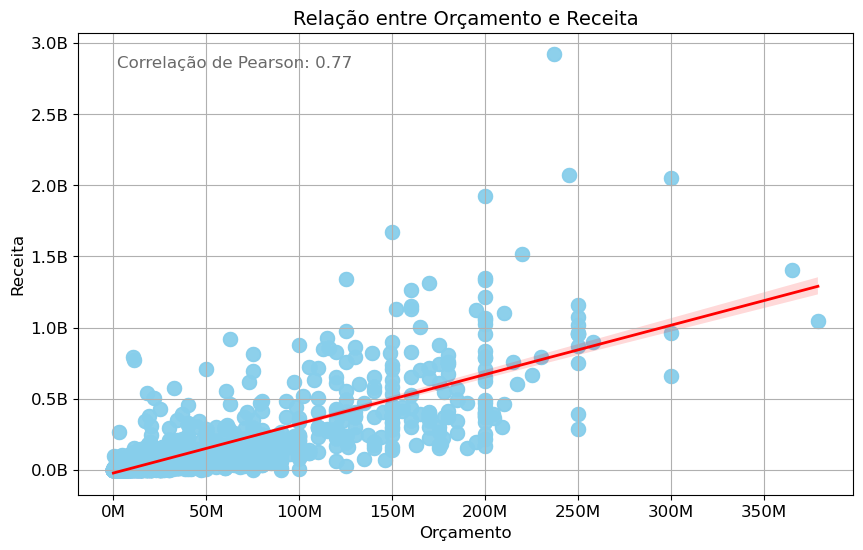

In [9]:
# Calcula a correlação de Pearson entre 'orçamento' e 'bilheteria'
pearson = df['budget'].corr(df['revenue'])
print("Correlação de Pearson:", pearson)

plt.figure(figsize=(10, 6))  # Tamanho da figura

# Gráfico de dispersão e linha de regressão
sns.regplot(x='budget', y='revenue', data=df, 
            marker='o', color='skyblue',
            scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'linewidth': 2, 'color': 'red'})

# Adiciona o valor da correlação de Pearson como legenda no gráfico
plt.text(0.05, 0.95, f'Correlação de Pearson: {pearson:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='dimgray')

plt.title('Relação entre Orçamento e Receita', fontsize=14)
plt.xlabel('Orçamento', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Receita', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Mudando os rótulos dos eixos para bilhões e centenas de milhões
plt.gca().set_xticklabels(['{:.0f}M'.format(x / 1e6) for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels(['{:.1f}B'.format(y / 1e9) for y in plt.gca().get_yticks()])

plt.show()

Correlação de Pearson: 0.3210828518880329


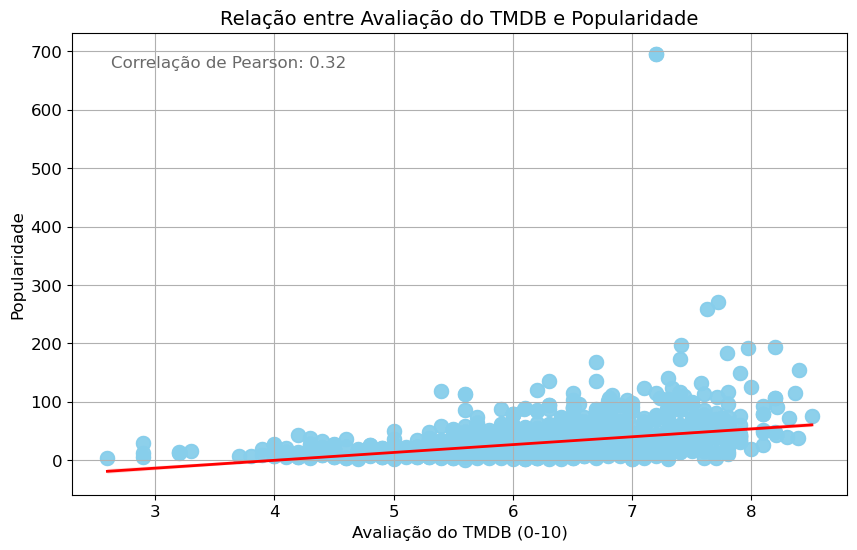

In [10]:
pearson = df['tmdb_rating'].corr(df['popularity'])
print("Correlação de Pearson:", pearson)

plt.figure(figsize=(10, 6))  # Tamanho da figura

sns.regplot(x='tmdb_rating', y='popularity', data=df, color='skyblue',
            scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'linewidth': 2, 'color': 'red'})

plt.text(0.05, 0.95, f'Correlação de Pearson: {pearson:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='dimgray')

plt.title('Relação entre Avaliação do TMDB e Popularidade', fontsize=14)
plt.xlabel('Avaliação do TMDB (0-10)', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Popularidade', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()


## Análise Descritiva

1. **Correlação entre Orçamento e Bilheteria**:
   - Uma correlação de 0.77 entre orçamento e bilheteria sugere uma correlação positiva forte entre essas duas variáveis.
   - Isso significa que, em geral, filmes com orçamentos maiores tendem a ter bilheterias maiores.
   - No contexto dos filmes, isso é razoavelmente esperado, pois filmes com orçamentos maiores muitas vezes têm mais recursos para produção, marketing e distribuição, o que pode levar a um maior alcance e atração de público, resultando em bilheterias mais altas.

2. **Correlação entre Nota e Popularidade**:
   - Uma correlação de 0.32 entre nota e popularidade sugere uma correlação positiva moderada entre essas duas variáveis.
   - Isso indica que filmes com notas mais altas tendem a ter uma popularidade um pouco maior, mas a relação não é tão forte quanto a correlação entre orçamento e bilheteria.
   - No contexto dos filmes, isso pode significar que filmes bem avaliados podem atrair mais atenção e interesse do público, o que pode levar a uma popularidade relativamente maior. No entanto, outros fatores, como marketing, elenco, gênero e distribuição, também podem influenciar significativamente a popularidade dos filmes.

A correlação de Pearson e a linha de regressão estão relacionadas de várias maneiras, especialmente quando estamos lidando com regressão linear simples.

1. **Direção da correlação e inclinação da linha de regressão**:
   - Se a correlação de Pearson é positiva, o coeficiente angular da linha de regressão é positivo, o que significa que à medida que uma variável aumenta, a outra também tende a aumentar.
   - Se a correlação de Pearson é negativa, o coeficiente angular da linha de regressão é negativo, indicando que à medida que uma variável aumenta, a outra tende a diminuir.

2. **Força da correlação e ajuste da linha de regressão**:
   - Quanto mais forte for a correlação de Pearson (mais próxima de 1 ou -1), mais ajustada será a linha de regressão aos dados.
   - Em outras palavras, quanto mais forte for a correlação, mais a linha de regressão se ajustará aos pontos de dados, representando melhor a relação entre as variáveis.

3. **Interpretação da linha de regressão em relação à correlação**:
   - A linha de regressão expressa a relação linear entre as variáveis preditora (independente) e resposta (dependente).
   - A inclinação da linha de regressão indica a mudança esperada na variável de resposta para uma unidade de mudança na variável preditora.
   - A correlação de Pearson quantifica a força e a direção da relação linear entre as variáveis. Quanto mais próxima de 1 ou -1 a correlação, mais próximo os pontos de dados estão da linha de regressão.

Em suma, a correlação de Pearson e a linha de regressão são medidas relacionadas que ajudam a entender e quantificar a relação linear entre as variáveis em um modelo de regressão linear. A correlação quantifica a força e a direção da relação, enquanto a linha de regressão representa a relação em um modelo linear.